# Exo 2 - Avec TOUTES les variables - BreastCancer

### Elvina Eury

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve
import itertools
from pandas_profiling import ProfileReport
#import pandas_profiling
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report


plt.style.use('bmh')
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')

In [4]:
cs=pd.read_csv('~/Projet_ML/BreastCancers.csv').T


## Data Pre Processing

In [5]:
new_header = cs.iloc[0]
cs = cs[1:] # data sans header
cs.columns = new_header
cs.head(5)

Sample_geo_accession,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,ER_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,P,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,P,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


#### Il y a 279 observations et 22298 variables
#### Nous sommes dans un cas où le nombre de variables > que le nombre d'observations

### Analyse des données

#### Analyse de la variable réponse

La variable treatment_response est notre variable Y: Elle est de type binaire: RD ou pCR

In [6]:
set(cs['treatment_response'])

{'RD', 'her2 status: N', 'pCR', 'pr_status: N', 'pr_status: P'}

La variable réponse a 5 catégories, dont 3 :
 - 'her2 status: N'
 - 'pr_status: N'
 - 'pr_status: P'
    
semblent être des erreurs. Je vais les enlever de la base de données.
Enfin, la variable treatment response n'aura que les 2 modalités: pCR et RD.

In [7]:
cs=cs[(cs.treatment_response != 'her2 status: N') & (cs.treatment_response != 'pr_status: N')& (cs.treatment_response != 'pr_status: P')]

In [8]:
set(cs['treatment_response'])

{'RD', 'pCR'}

La variable réponse, treatment_response a bien 2 modalités

#### Analyse de quelques variables explicatives non génétique

Répartition de des ethnicités

Text(0.5, 1.0, "Répartition de l'éthinicité des individus de l'étude")

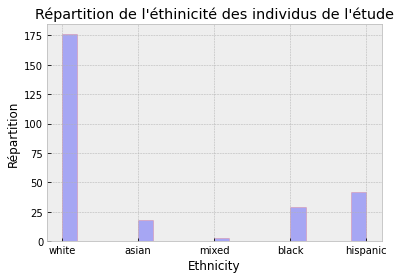

In [25]:
plt.hist(cs['ethnicity'],rwidth=2,alpha=0.3,color='blue',bins=20,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Ethnicity') 
plt.ylabel('Répartition') 

#plot title 
plt.title("Répartition de l'éthinicité des individus de l'étude") 

### Analyse des valeurs manquantes

In [9]:
missing_data = pd.DataFrame({'total_missing': cs.isnull().sum(axis = 0), 'perc_missing': (cs.isnull().sum()/len(cs))*100})   

missing_data

,total_missing,perc_missing
Sample_geo_accession,,
Sample_title,0,0.0
tissue,0,0.0
age,0,0.0
ethnicity,0,0.0
treatment_response,0,0.0
...,...,...
AFFX-ThrX-5_at,0,0.0
AFFX-ThrX-M_at,0,0.0
AFFX-TrpnX-3_at,0,0.0


In [10]:
columns_with_missing_values = missing_data.loc[missing_data['perc_missing']>0]
columns_with_missing_values

,total_missing,perc_missing
Sample_geo_accession,,
treatment code,11,4.104478


Les 10 observations manquantes dans la variable 11, her2_status, sont également manquantes dans la variable 12,histology. Cette dernière 
Comme nous n'avons pas beaucoup d'observations comparés aux variables nous n'allons pas enlever les observations de notre base de données.
De plus, comme il y a beaucoup de valeurs manquantes surtout pour les variables 11 et 12, nous allons utiliser une technique d'imputation, soit nous allons assigner à chacune des valeurs manquantes, une valeur calculée.
Il existe différentes techniques d'imputation ou d'assignation des valeurs manquantes. Voici les plus communes:
- l'utilisation de la valeur moyenne d'une variable, aussi appelé 'mean imputation'.
- l'utilisation de la valeur moyenne des k plus proches voisins associés à des données entrainés, aussi appelé knn imputation
- l'utilisation de la fréquence, une technique généralement utilisée lorsque les variables sont qualitatives.

Comme la variable 11, her2_status et la variable histology sont de type qualitatives, nous utiliserons la fréquence comme technique d'assignation. 


In [11]:
# Je crée une liste des variables ayant des données manquantes
missing_variables=(columns_with_missing_values.index).tolist()
missing_variables

['treatment code']

In [12]:
# Je remplace les valeurs manquantes par les valeurs les plus communes des variables.
quali = cs.loc[:,missing_variables].apply(lambda x: x.fillna(x.value_counts().index[0]))
# Je crée un dataframe SANS les variables de la liste missing_variables
cs_without_quali = cs.drop(missing_variables, axis=1) # ok, il manque bien les 5 colonnes manquantes

In [13]:
# Je crée un nouveau dataframe joignant toutes les variables.
cs_imputed=pd.concat([quali,cs_without_quali],axis=1)
cs_imputed.head(5) # il y a bien toutes les colonnes et lignes (278 x 22298)

Sample_geo_accession,treatment code,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,TFAC,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,TFAC,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,TFAC,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,TFAC,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,TFAC,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


#### Nous procédons maintenant au encoding

Il existe plusieurs méthodes pour le faire:
- Label Encoding: On choisi un nombre arbitraire pour chaque catégorie
- OneHotEncoding: On crée une colonne binaire pour chaque catégorie (on peut utiliser la méthode pd.dummies pour nous aider à implémenter le OneHotEncoding).
- Vecteur representation a.k.a word2vec où on trouve un sous espace de plus petite dimension qui 'fit' les données
- Optimal binning où on utilise des méthodes de LightGBM ou CatBoost
- Target encoding: On fait la moyenne de la variable réponse par catégorie.


Je choisi d'utiliser LabelEncoding

In [578]:
# Je commence par enlever la colonne ID_Ref qui est une répétition de l'indice
cs_imputed=cs_imputed.drop('ID_REF', 1)
cs_imputed.head(5)

Sample_geo_accession,treatment code,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,TFAC,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,TFAC,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,TFAC,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,TFAC,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,TFAC,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


In [579]:
Y=cs_imputed['treatment_response']
X=cs_imputed.drop('treatment_response',1)
Y

GSM505327    RD
GSM505328    RD
GSM505329    RD
GSM505330    RD
GSM505331    RD
             ..
GSM505601    RD
GSM505602    RD
GSM505603    RD
GSM505604    RD
GSM505605    RD
Name: treatment_response, Length: 268, dtype: object

In [580]:
# Listes des variables qualitatives et quantititaves
categorical_columns = list(cs_imputed.columns[:14]) # colonnes catégorielles
categorical_columns

['treatment code',
 'Sample_title',
 'tissue',
 'age',
 'ethnicity',
 'treatment_response',
 'T (tumor)',
 'N (Node)',
 'bmn_grade',
 'PR_status: ',
 'ER_status: ',
 'her2_status',
 'histology',
 'MAQC_Distribution_Status']

#### Nous standardisons les données quantitatives

StandardScaler normalise les données (moyenne = 0, variance unitaire). Il marche moins bien lorsqu'il y a des valeurs abérantes.
MinMaxScaler met les valeurs de chaque variable dans certains range: [0 ,1] ou [-1,1]. En gros, il recadrage les données.
RobustScaler permet d'enlever les valeurs abérantes avant d'utiliser StandardScaler ou MinMaxScaler.



Afin de choisir la bonne technique de normalisation, je commence par regarder s'il y a présence de valeurs abérrantes potentielles. J'utilise ici des intervalles de confiance. Les valeurs se retrouvant en dehors de l'intervalle de confiance sera considérée comme abérrante et possiblement enlever du jeu de données (cela dépendra à quel point elle est abérrante et s'il en y a beaucoup). Il est important de noter que l'objectif reste de minimiser les pertes de données ainsi on ne supprimera que dans les cas les plus atypiques.

In [581]:
# Traitement des valeurs abérantes (outliers)
Q1 = cs_imputed.iloc[:,14:].quantile(0.25)
Q3 = cs_imputed.iloc[:,14:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
cs_imputed.iloc[:,14:] = cs_imputed[~((cs_imputed.iloc[:,14:] < (Q1 - 1.5 * IQR)) |(cs_imputed.iloc[:,14:] > (Q3 + 1.5 * IQR))).any(axis=1)]
cs_imputed.shape


Series([], dtype: float64)


(268, 22297)

Je n'ai pas détecté d'outliers flagrant: Je choisi Standard Scaler

In [582]:
numerical_columns = list(cs.columns[15:]) # colonnes génétiques

In [583]:
scaler = StandardScaler()
scaler.fit_transform(cs_imputed.iloc[:,14:].values)
#scaler.fit_transform(numerical_columns)

array([[ 0.93465939,  0.3463953 , -1.14600441, ..., -1.43328322,
        -1.03473567, -1.05792573],
       [ 0.56078945, -0.32232983,  0.30009164, ...,  1.02318208,
        -0.96192125, -0.55005759],
       [ 1.28304169,  0.73198979, -0.3790667 , ...,  0.72636323,
        -1.23895437, -0.56013119],
       ...,
       [ 0.12719244, -0.92911206,  0.52114106, ...,  0.76579586,
        -1.60994655, -0.40540515],
       [-0.20583586, -0.47938087,  0.85481307, ..., -0.43208269,
         0.30383488,  0.6476827 ],
       [ 0.22146601, -0.15289021, -0.43427385, ...,  1.3998364 ,
         0.43377826,  0.97909297]])

#### LabelEncoding

On passe maintenant au Encoding des variables qualitatives (incluant la variable réponse).
Mon choix du 'encoding' demande à ce que je divise en 2 sous-étapes:

    - 1. J'applique le LabelEncoder qui converti les strings en nombres
    - 2. J'utilise pd.get_dummies qui agit comme OneHotEncoding.

In [584]:
# On converti les strings en nombres - on commence donc par faire le label encoding
le = LabelEncoder() 
for catvar in categorical_columns: 
    cs_imputed[catvar]= le.fit_transform(cs_imputed[catvar]) 


In [585]:
# OneHotEncoding
cs_imputed_encoded = pd.get_dummies(cs_imputed, columns=categorical_columns, drop_first=True)

In [586]:
# Je retrouve la variable réponse
cs_imputed_encoded.filter(regex='treatment_response')

,treatment_response_1
GSM505327,0
GSM505328,0
GSM505329,0
GSM505330,0
GSM505331,0
...,...
GSM505601,0
GSM505602,0
GSM505603,0
GSM505604,0


## Model selection

In [587]:
X=cs_imputed_encoded.iloc[:, cs_imputed_encoded.columns != 'treatment_response_1']
y=cs_imputed_encoded.treatment_response_1


Je commence par 'split' les données, ici je choisi un split de 35% (un choix aléatoire qui fait parti à améliorer dans la méthodologie).

In [588]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.35,random_state=42)
print('Xf_train: ', Xf_train.shape)
print('Xf_test: ',Xf_test.shape)

Xf_train:  (174, 22701)
Xf_test:  (94, 22701)


#### Reduction de dimension

Nous cherchons maintenant à réduire le nombre de dimensions. Tel que vu précédemment nous avons plus de 22000 variables.
Il existe plusieurs techniques de réduction de dimension, tel que l'utilisation du Lasso (qui élimine les variables moins significatives) ou le Ridge (qui réduit ces dites variables), ou encore l'Elastic-Net qui lui combine à la fois le Lasso et le Ridge.

Nous choisissons ici d'utiliser une autre technique, soit l'ACP, afin de réduire les dimensions. 



Je commence d'abords par regarder le nombre de variables sélectionnées lorsque je choisi une variance expliquée de 98% (un pourcentage que je considère élevé). Ce pourcentage sera réduit si cela demande trop de dimensions.

In [589]:
pca1=PCA()
pca1.fit(Xf_train)
cum_sum=np.cumsum(pca1.explained_variance_ratio_)
d=np.argmax(cum_sum>=0.98)+1 # ici nous calcuons la valeur d qui maximise la variance expliquée à 95%.

In [590]:
print('Le nombre de variables initiales : ', Xf_train.shape[1])
print("Le nombre de variables après l'ACP en choisissant 98% d'inertie : ", d)

Le nombre de variables initiales :  22701
Le nombre de variables après l'ACP en choisissant 98% d'inertie :  163


On remarque qu'avec 98% de variance expliquée on passe de 22701 dimensions à 163 dimensions ce qui représente une nette réduction de dimension.
Une ACP à 98% sera ainsi utilisé plus tard dans les pipelines.

En ce qui concerne le Lasso, les mêmes critères de modélisation seront utilisés que dans le cas des données génétiques uniquement. 

#### Creation de Pipelines

Dans cette section je vais construire plusieurs pipelines. La meilleure approche est de créer un seul pipeline qui nous sortirait le meilleur modèle, la meilleur démarche automatiquement. Toutefois, afin de mieux analyser les différents résultats, j'ai opté d'utiliser des pipelines séparés. 


Il aurait été également possible d'incorporer le StandardScaler des variables quantitatives et le OneHotEncoding(ou LabelEncoding) des variables qualitatives directement dans les pipelines mais comme cela a déjà été fait au début lors du prétraitement de données, je n'utiliserai pas ces options ici. Toutefois, cela fait partie des améliorations qui pourraient être fait dans le future afin d'uniformiser la structure et rendre le programme plus performant.


On construit les pipelines

In [591]:
########################## SANS Réduction de dimension ##########################################

# SVM sans ACP
pipe_svm = Pipeline([('clf', SVC(random_state=42))])


########################## AVEC Réduction de dimension (ACP) #####################################

# SVM avec ACP
pipe_svm_pca = Pipeline([('pca', PCA(0.98)),
                         ('clf', SVC(random_state=42))])

# XGBoost avec ACP
pipe_xgb_pca = Pipeline([('pca', PCA(0.98)),
                         ('clf', XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1))])

# Random Forest avec ACP
pipe_rf_pca = Pipeline([('pca', PCA(0.98)),
                         ('clf', RandomForestClassifier())])

########################## AVEC Réduction de dimension (LASSO) ####################################

# SVM avec Lasso
pipe_svm_lasso = Pipeline([('feature_selection', SelectFromModel(LogisticRegression(C=3.3,penalty='l1',solver='liblinear'))),
                         ('clf', SVC())])

# XGBoost avec Lasso
pipe_xgb_lasso = Pipeline([('feature_selection', SelectFromModel(LogisticRegression(C=3.3,penalty='l1',solver='liblinear'))),
                         ('clf', XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1))])

# Random Forest avec Lasso
pipe_rf_lasso = Pipeline([('feature_selection', SelectFromModel(LogisticRegression(C=3.3,penalty='l1',solver='liblinear'))),
                         ('clf', RandomForestClassifier())])

########################## Régression Logistique pénalisée ####################################

# Régression Logistique pénalisée 
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=42))])

On crée le grid des paramètres

In [592]:
# grid_params_lr_initial = '{'clf__penalty': ['l1', 'l2','elasticnet'],'clf__C': [1.0, 0.5, 0.1], 'clf__solver': ['liblinear','saga']}]
# 'penalty' compare le lasso (l1), le ridge(l2) et l'elasticnet
# 'solver' est l'algorithme pour l'optimisation, saga est le seul utilisé pour l'elastic net.

grid_params_lr = [{'clf__penalty': ['l1','l2','elasticnet'], 
'clf__C': [0.05,0.1,0.15], # le degré de pénalisation
'clf__solver': ['liblinear','saga']}]

# grid_params_svm_initial = ''clf__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], clf__gamma':[0.00005,0.0001,0.001]}]. 
# Après avoir utilisé grid_params_svm_initial, je réduit les choix des paramètres afin de raccourcir le temps de calcul
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
'clf__C': [1,2],                 
'clf__gamma':[0.00005]}]

# ATTENTION TRÈS LONG
# grid_params_xgb_initial = [ { 'clf__min_child_weight': [1, 5, 10], 'clf__gamma': [0.5, 1, 1.5, 2, 5], 'clf__subsample': [0.6, 0.8, 1.0],'clf__colsample_bytree': [0.6, 0.8, 1.0],'clf__max_depth': [3, 4, 5]}]
# Après avoir utilisé grid_params_xgb_initial, je réduit les choix des paramètres afin de raccourcir le temps de calcul:
grid_params_xgb=[{'clf__colsample_bytree': [0.8,1.0], 
                  'clf__gamma': [2,2.5], 
                  'clf__max_depth': [2,3]}]

# grid_params_rf_initial = '
    # bootstrap': [True,False],
    #'max_depth': [300,400,500,550,600,650,670],
    #'max_features': [10,12,14,16,18,20,30,40],
    #'min_samples_leaf': [5,6,8,10,15],
    #'min_samples_split': [2,3,4,5,8,9,10],
    #'n_estimators': [10,15,18,20,22,23,25,30]'
# Après avoir utilisé grid_params_rf_initial, je réduit les choix des paramètres afin de raccourcir le temps de calcul
grid_params_rf = [{
    'clf__bootstrap': [False],
    'clf__max_depth': [600],
    'clf__max_features': [40],
    'clf__min_samples_leaf': [5,6,8,10,15],
    'clf__min_samples_split': [5],
    'clf__n_estimators': [22]}]
#RandomForestClassifier(bootstrap=False, max_depth=600, max_features=40,min_samples_leaf=5, n_estimators=22)

On crée les gridSearchCV

In [593]:
# Sans réduction de dimension
jobs = -1
cv = KFold(n_splits=4, shuffle=True, random_state=42) 
# je choisi de divisé en 3 et pas plus car la taille des données est petite.

gs_svm = GridSearchCV(estimator=pipe_svm,
param_grid=grid_params_svm,
scoring='accuracy',
cv=cv,
n_jobs=jobs)


# Avec Réduction de dimension

gs_lr = GridSearchCV(estimator=pipe_lr,
param_grid=grid_params_lr,
scoring='accuracy',
cv=cv,n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
param_grid=grid_params_svm,
scoring='accuracy',
cv=cv,
n_jobs=jobs)

gs_xgb_pca=GridSearchCV(estimator=pipe_xgb_pca,
param_grid=grid_params_xgb,
scoring='accuracy',cv=cv, n_jobs=jobs)

gs_rf_pca=GridSearchCV(estimator=pipe_rf_pca,
param_grid=grid_params_rf,                        
scoring='accuracy',
cv=cv,n_jobs=jobs)

gs_svm_lasso = GridSearchCV(estimator=pipe_svm_lasso,
param_grid=grid_params_svm,
scoring='accuracy',
cv=cv,
n_jobs=jobs)

gs_xgb_lasso=GridSearchCV(estimator=pipe_xgb_lasso,
param_grid=grid_params_xgb,
scoring='accuracy',cv=cv, n_jobs=jobs)

gs_rf_lasso=GridSearchCV(estimator=pipe_rf_lasso,
param_grid=grid_params_rf,                        
scoring='accuracy',
cv=cv,n_jobs=jobs)

In [594]:
grids = [gs_svm, gs_lr, gs_svm_pca,gs_xgb_pca,gs_rf_pca,gs_svm_lasso,gs_xgb_lasso,gs_rf_lasso]


In [595]:
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Support Vector Machine sans réduction de dimensions',
             1: 'Logistic Regression pénalisé',
             2: 'Support Vector Machine avec Réduction: PCA',
             3: 'XGBoost avec Réduction: PCA',
             4: 'Random Forest avec Réduction: PCA',
             5: 'Support Vector Machine avec Réduction: Lasso Logistique',
             6: 'XGBoost avec Réduction: Lasso Logistique',
             7: 'Random Forest avec Réduction: Lasso Logistique'
             }


In [596]:
#Plotting the confusion matrix
class_names=['RD','pCR']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [597]:
# ATTENTION LONG À ROULER CAR IL ROULE TOUS LES CLASSIFIEURS ET PARAMÈTRES

In [604]:
# Fit the grid search objects
print('On débute ...')
print('Nous utilisons les mesures de performances suivantes: ')
print("/n - Accuracy score, calculé sur les données test.")
print("/n - Le cross validation score, calculé à partir des données d'entraînement.")
print("/n - Les matrices de confusion qui affichent les scores de précision et scores de recall - calculés sur données d'entraînement.")


best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimateur: %s' % grid_dict[idx])
    #Fit sur les données train, permet de trouver l'estimateur (le classifieur estimé)
    gs.fit(Xf_train, yf_train)
    print('Les meilleurs paramètres sont : %s' % gs.best_params_)
    print('Le cross validation score sur données train: %.3f' % gs.best_score_)
    
    # Predict sur les données test
    y_pred = gs.predict(Xf_test)
    # Test data accuracy of model with best params
    print('Accuracy score sur données test pour les meilleurs paramètres: %.3f ' % accuracy_score(yf_test, y_pred))
    print(confusion_matrix(yf_test,y_pred))
    
    cm=confusion_matrix(yf_test,y_pred)
    print(classification_report(yf_test, y_pred))
    # On veut sortir le classifieur ayant le meilleur accuracy score (1-erreur de classification minimum)
    if accuracy_score(yf_test, y_pred) > best_acc:
        best_acc = accuracy_score(yf_test, y_pred)
        best_gs = gs
        best_clf = idx
        best_yf=y_pred
        



On débute ...

Estimateur: Support Vector Machine sans réduction de dimensions
Les meilleurs paramètres sont : {'clf__C': 1, 'clf__gamma': 5e-05, 'clf__kernel': 'linear'}
Le meilleur accuracy score sur données train: 0.828
Recall(moyen) sur données test pour les meilleurs paramètres: 0.883 
[[75  3]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        78
           1       0.73      0.50      0.59        16

    accuracy                           0.88        94
   macro avg       0.82      0.73      0.76        94
weighted avg       0.87      0.88      0.87        94


Estimateur: Logistic Regression pénalisé
Les meilleurs paramètres sont : {'clf__C': 0.15, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Le meilleur accuracy score sur données train: 0.822
Recall(moyen) sur données test pour les meilleurs paramètres: 0.862 
[[75  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.88   

In [565]:
print('Meilleur classifieur : ',grid_dict[best_clf])
print('Meilleur Recall : ',round(best_acc,3))
print('Erreur de classification : ',round(1-best_acc,3))

Meilleur classifieur :  Support Vector Machine sans réduction de dimensions
Meilleur accuracy score :  0.883
Erreur de validation croisée :  0.117


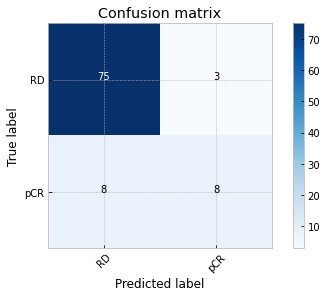

In [601]:
cm=confusion_matrix(yf_test,best_yf)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Nous faisons les mêmes interprétations que dans les cas où uniquement les variables génétiques sont prises en compte.
Veuillez vous référer à l'autre fichier Projet_Exo2_GeneticOnly_Final.

# svp voir données génétiques pour la suite.